In [1]:
import numpy as np
from matplotlib import pyplot
from methods import *
import time

# Однопараметрический метод

In [24]:
SIZES = [i for i in range(5, 300, 20)]
EPS = 0.000000001
y = {'min': [], 'opt': [], 'max': []}

for size in SIZES:
    A = np.random.randint(low=1, high=10, size=(size, size))
    A += A.T
    for i in range(size):
        A[i][i] += 5 * sum(A[i])
    f = np.random.randint(low=1, high=10, size=size)
    x0 = np.zeros(size)
    vals = np.linalg.eigh(A)[0]
    min_v, max_v = min(vals), max(vals)
    t_min, t_opt, t_max = 0.2/max_v, 2/(min_v + max_v), 1.8/max_v
    
    start_time = time.time()
    one_param(A, f, x0, t_min, EPS)
    y['min'].append(time.time() - start_time)

    start_time = time.time()
    one_param(A, f, x0, t_opt, EPS)
    y['opt'].append(time.time() - start_time)

    start_time = time.time()
    one_param(A, f, x0, t_max, EPS)
    y['max'].append(time.time() - start_time)

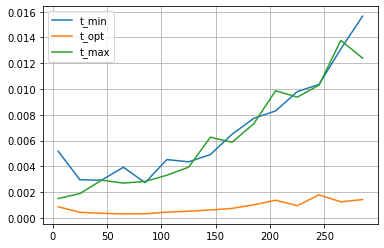

In [25]:
pyplot.plot(SIZES, y['min'], label='t_min')
pyplot.plot(SIZES, y['opt'], label='t_opt')
pyplot.plot(SIZES, y['max'], label='t_max')
pyplot.grid()
pyplot.legend()
pyplot.show()

# Сравнение методов Якоби, Зейделя и однопараметрического

In [31]:
SIZES = [i for i in range(10, 400, 30)]
EPS = 0.000000000000001
y = {'jacobi': [], 'zeidel': [], 'param': []}

for size in SIZES:
    A = np.random.randint(low=1, high=100, size=(size, size))
    A += A.T
    for i in range(size):
        A[i][i] += 5 * sum(A[i])
    f = np.random.randint(low=1, high=100, size=size)
    x0 = np.zeros(size)
    vals = np.linalg.eigh(A)[0]
    min_v, max_v = min(vals), max(vals)
    t_opt = 2/(min_v + max_v)
    
    start_time = time.time()
    jacobi(A, f, x0, EPS)
    y['jacobi'].append(time.time() - start_time)

    start_time = time.time()
    zeidel(A, f, x0, EPS)
    y['zeidel'].append(time.time() - start_time)

    start_time = time.time()
    one_param(A, f, x0, t_opt, EPS)
    y['param'].append(time.time() - start_time)

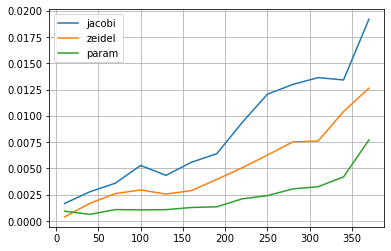

In [32]:
pyplot.plot(SIZES, y['jacobi'], label='jacobi')
pyplot.plot(SIZES, y['zeidel'], label='zeidel')
pyplot.plot(SIZES, y['param'], label='param')
pyplot.grid()
pyplot.legend()
pyplot.show()

# Алгоритм Штрассена

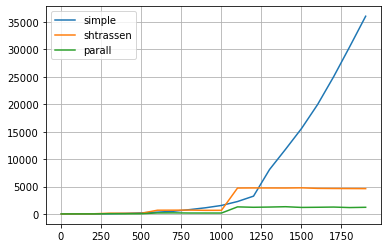

In [33]:
sizes = [2, 102, 202, 302, 402, 502, 602, 702, 802, 902, 1002, 1102, 1202, 1302, 1402, 1502, 1602, 1702, 1802, 1902]
simple = [0, 12, 7, 37, 100, 195, 324, 483, 780, 1119, 1543, 2259, 3243, 8100, 11793, 15594, 19953, 25019, 30476, 36057]
shtrassen = [0, 20, 23, 128, 113, 115, 675, 682, 699, 654, 660, 4720, 4738, 4728, 4723, 4757, 4657, 4637, 4625, 4612]
parall = [1, 7, 6, 41, 27, 36, 178, 192, 162, 161, 159, 1283, 1210, 1252, 1314, 1184, 1213, 1250, 1160, 1209]

pyplot.plot(sizes, simple, label='simple')
pyplot.plot(sizes, shtrassen, label='shtrassen')
pyplot.plot(sizes, parall, label='parall')
pyplot.grid()
pyplot.legend()
pyplot.show()

# Холецкий

In [10]:
size = 5
A = np.random.randint(low=1, high=100, size=(size, size))
A += A.T
for i in range(size):
    A[i][i] += 5 * sum(A[i])

H = holeskiy(A)
print('L*L.T - A =', np.linalg.norm(np.matmul(H, H.T) - A, ord=2), '\n')

print(A)
print(np.linalg.norm(H - np.linalg.cholesky(A), ord=2))
print(np.linalg.cholesky(A))

L*L.T - A = 1.4210854715202004e-14 

[[2868   51  114   82   89]
 [  51 2312  126  118   81]
 [ 114  126 2553  157   92]
 [  82  118  157 2891  106]
 [  89   81   92  106 2932]]
2.220446049250313e-16
[[53.55371136  0.          0.          0.          0.        ]
 [ 0.95231495 48.07382964  0.          0.          0.        ]
 [ 2.12870401  2.57880024 50.41644978  0.          0.        ]
 [ 1.53117306  2.42422628  2.92541405 53.61175793  0.        ]
 [ 1.66188295  1.65198747  1.67013341  1.76388072 54.04265409]]
